In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/EU_Green/Catalonia'
os.chdir(folder_path)


Mounted at /content/drive


In [ ]:
import os
import requests
from zipfile import ZipFile
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc

In [ ]:
df = pd.read_csv('EPC_Catalonia.csv')
df.shape

(1336925, 69)

In [ ]:
df=0

In [ ]:
eda = pd.read_csv('EDA_prepaired.csv')

In [ ]:
eda['ACTUACIONS_REHABILITACIO'] = eda['ACTUACIONS_REHABILITACIO'].fillna('')
eda[eda['ACTUACIONS_REHABILITACIO']!= '']['ACTUACIONS_REHABILITACIO'][1336532]

'Aïllament en façanes i/o coberta. || Renovació de finestres i/o proteccions solars. || Millora de les instal·lacions (calefacció, climatització, ACS, enllumenat,...)'

In [ ]:
eda['ACTUACIONS_REHABILITACIO'] = eda['ACTUACIONS_REHABILITACIO'].fillna('')

# Split renovation actions into individual measures
eda['Renovation_Types'] = eda['ACTUACIONS_REHABILITACIO'].apply(lambda x: x.split('||') if x else [])

# Get unique renovation types
all_renovation_types = set()
eda['Renovation_Types'].apply(lambda x: all_renovation_types.update([item.strip() for item in x]))



,Renovation_Types
0,None
1,None
2,None
3,None
4,None
...,...
1336920,None
1336921,None
1336922,None
1336923,None


In [ ]:
!pip install googletrans

In [ ]:
import ast
from googletrans import Translator
import asyncio
import nest_asyncio
def parse_and_clean(record):
    try:
        # Convert the string to a Python list using ast.literal_eval.
        parsed = ast.literal_eval(record)
        # Ensure the result is a list, then strip whitespace from each element.
        if isinstance(parsed, list):
            # print('1')
            return [item.strip() for item in parsed]
        else:
            # print('2')

            return [str(parsed).strip()]
    except Exception as e:
        print(f"Error processing record: {record}. Error: {e}")
        return []

ren_type['Renovation_Types'] = ren_type['Renovation_Types'].apply(parse_and_clean)




In [ ]:
import pandas as pd
import asyncio
from googletrans import Translator
import nest_asyncio

# Allow nested event loops
nest_asyncio.apply()

# Initialize the translator
translator = Translator()

# Define the asynchronous translation function
async def translate_all(item):
    results = []
    for text in item:
        translation = await translator.translate(text, src='ca', dest='en')
        results.append(translation.text)
    return results

# Define a function to apply translations to the DataFrame
async def translate_dataframe(df, column_name):
    tasks = []
    for index, row in df.iterrows():
        tasks.append(translate_all(row[column_name]))
    return await asyncio.gather(*tasks)


# Run the asynchronous translation
async def main():
    translated_results = await translate_dataframe(ren_type, 'Renovation_Types')
    ren_type['Translated_Renovation_Types'] = translated_results

# Execute the main function
await main()

ren_type


,Unnamed: 0,Renovation_Types,Translated_Renovation_Types
0,28,"[Millora de les instal·lacions (calefacció, cl...","[Improvement of facilities (heating, air condi..."
1,100,[Es tracta d'un edifici en construcció amb una...,[It is a building under construction with a gr...
2,111,[Renovació de finestres i/o proteccions solars...,"[Renewal of windows and/or sun protections., I..."
3,199,"[Millora de les instal·lacions (calefacció, cl...","[Improvement of facilities (heating, air condi..."
4,231,"[Mejora de las instalaciones (calefacción, cli...","[Mejora of installations (heating, climatizati..."
...,...,...,...
17107,1336302,[Renovació de finestres i/o proteccions solars...,"[Renewal of windows and/or sun protections., C..."
17108,1336532,"[Aïllament en façanes i/o coberta., Renovació ...","[Insulation on facades and/or roof., Renewal o..."
17109,1336570,[Renovació de finestres i/o proteccions solars.],[Renewal of windows and/or sun protections.]
17110,1336683,[Renovació de finestres i/o proteccions solars.],[Renewal of windows and/or sun protections.]


In [ ]:
ren_type = pd.read_csv('renovation_types.csv')
ren_type

,Unnamed: 0,Renovation_Types,Translated_Renovation_Types
0,28,"['Millora de les instal·lacions (calefacció, c...","['Improvement of facilities (heating, air cond..."
1,100,"[""Es tracta d'un edifici en construcció amb un...",['It is a building under construction with a g...
2,111,['Renovació de finestres i/o proteccions solar...,"['Renewal of windows and/or sun protections.',..."
3,199,"['Millora de les instal·lacions (calefacció, c...","['Improvement of facilities (heating, air cond..."
4,231,"['Mejora de las instalaciones (calefacción, cl...","['Mejora of installations (heating, climatizat..."
...,...,...,...
17107,1336302,['Renovació de finestres i/o proteccions solar...,"['Renewal of windows and/or sun protections.',..."
17108,1336532,"['Aïllament en façanes i/o coberta.', 'Renovac...","['Insulation on facades and/or roof.', 'Renewa..."
17109,1336570,['Renovació de finestres i/o proteccions solar...,['Renewal of windows and/or sun protections.']
17110,1336683,['Renovació de finestres i/o proteccions solar...,['Renewal of windows and/or sun protections.']


### Categorizing

In [ ]:
# split all records by comma and put each piece of string in seperate row
import ast
# Convert the string representation of a list into an actual list
ren_type['Translated_Renovation_Types'] = ren_type['Translated_Renovation_Types'].apply(ast.literal_eval)
df_exploded = ren_type.explode('Translated_Renovation_Types')
df_exploded

,Unnamed: 0,Renovation_Types,Translated_Renovation_Types
0,28,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit..."
1,100,"[""Es tracta d'un edifici en construcció amb un...",It is a building under construction with a gra...
2,111,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.
2,111,['Renovació de finestres i/o proteccions solar...,"Improvement of facilities (heating, air condit..."
3,199,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit..."
...,...,...,...
17108,1336532,"['Aïllament en façanes i/o coberta.', 'Renovac...","Improvement of facilities (heating, air condit..."
17109,1336570,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.
17110,1336683,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.
17111,1336815,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit..."


group all simillar phrases

In [ ]:
def group_similar_Photovoltaic(record):
    if ('photovoltaic' in record.lower() and 'self' not in record.lower() and 'consumption' not in record.lower() and ',' not in record.lower()) or 'Solar photovoltian installation' in record:
        return 'Photovoltaic'
    elif 'photovoltaic' in record.lower() and 'self' in record.lower() and 'consumption' in record.lower()  and ',' not in record.lower():
        return 'Photovoltaic self consumption'
    elif 'photovoltaic' not in record.lower() and ('solar panel' in record.lower() or 'solar plate' in record.lower() or 'solar panels' in record.lower() or 'solar plates' in record.lower()) and ',' not in record.lower():
        return 'solar panel'
    elif 'Mejora of installations (heating, climatization, ACS, Albrado, ...)' in record :
        return 'Improvement of facilities (heating, air conditioning, ACS, lighting, ...)'
    else:
        return record  # Return the original record if no condition is met

# Apply the function to update the column
df_exploded['Translated_Renovation_Types'] = df_exploded['Translated_Renovation_Types'].apply(group_similar_Photovoltaic)

In [ ]:
def Merge_All_Photovoltaic(record):
    if 'photovoltaic' in record.lower() and 'self' in record.lower() and 'consumption' in record.lower():
        return 'Photovoltaic'
    else:
        return record
df_exploded['Merge_All_Photovoltaic'] = df_exploded['Translated_Renovation_Types'].apply(Merge_All_Photovoltaic)

In [ ]:
!pip install fuzzywuzzy

In [ ]:

import pandas as pd
from fuzzywuzzy import fuzz

# Sample list of category strings
phrases = df_exploded['Translated_Renovation_Types']

# Define a similarity threshold (90 out of 100)
threshold = 80

# Create groups by comparing each phrase with the others
groups = []
visited = set()

for phrase in phrases:
    if phrase in visited:
        continue
    # Start a new group with the current phrase as the representative
    group = [phrase]
    visited.add(phrase)
    for candidate in phrases:
        if candidate not in visited:
            # Compare the phrases using fuzzy matching (ignoring case)
            similarity = fuzz.ratio(phrase.lower(), candidate.lower())
            if similarity >= threshold:
                group.append(candidate)
                visited.add(candidate)
    groups.append(group)

# Create a mapping dictionary to assign a canonical label for each group
mapping = {}
for group in groups:
    # Use the first element in each group as the representative label
    representative = group[0]
    for item in group:
        mapping[item] = representative

# Example DataFrame with a column containing the strings
df = pd.DataFrame({'phase': phrases})
df_exploded['phrase_grouped_based_on_similarity'] = df['phase'].map(mapping)

df_exploded.head()


,Unnamed: 0,Renovation_Types,Translated_Renovation_Types,phrase_grouped_based_on_similarity,grouped_translated
0,28,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
1,100,"[""Es tracta d'un edifici en construcció amb un...",It is a building under construction with a gra...,It is a building under construction with a gra...,Other
2,111,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.
2,111,['Renovació de finestres i/o proteccions solar...,"Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
3,199,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."


In [ ]:
print('unique renovations',df_exploded['phrase_grouped_based_on_similarity'].unique())
print('number of unique renovations',df_exploded['phrase_grouped_based_on_similarity'].nunique())

unique renovations ['Improvement of facilities (heating, air conditioning, ACS, lighting, ...)'
 'It is a building under construction with a graduate of works in force in 2004 granted by the City Council of Salou, file 855/05. Construction was completed on December 30, 2022.'
 'Renewal of windows and/or sun protections.'
 'Mejora of installations (heating, climatization, ACS, Albrado, ...)'
 'Photovoltaic' 'Photovoltaic plates and installation of more heat pumps'
 'Photovoltaic installation by self -consumption scheme'
 'Comprehensive rehabilitation retaining facades'
 'Installation solar panels' 'Insulation on facades and/or roof.'
 'Installation of photovoltaic placas.'
 'Incorporation of photovoltaic panels 3.76 kwp'
 'Solar photovoltaic installation'
 'installation of plates for self -consumption electric'
 'Installation of photovoltaic panels for self -consumption with surplus and a nominal power of 3KW.'
 'Masia reform' 'A? Lat in? Anes and/or cover.'
 'FV FV Installation 11 x So

#### count the uniques **before** grouping similar phrases

In [ ]:
import pandas as pd

def reduce_cardinality(df, column, threshold=0.0005):
    total = len(df)
    counts = df[column].value_counts()
    # Determine values that meet the threshold frequency
    keep = counts[counts / total >= threshold].index
    df['grouped_translated'] = df[column].apply(lambda x: x if x in keep else 'Other')
    return df, counts
df, counts = reduce_cardinality(df_exploded,'Translated_Renovation_Types')

In [ ]:
13/26000

0.0005

In [ ]:
counts

,count
Translated_Renovation_Types,
"Improvement of facilities (heating, air conditioning, ACS, lighting, ...)",9173
Renewal of windows and/or sun protections.,7521
Insulation on facades and/or roof.,3810
Photovoltaic,2396
Photovoltaic self consumption,531
...,...
FV Installation,1
Pavements and interior carpinteria.,1
Comprehensive reform of the vivienda without systematization systems or heating and without intervention in the forging in contact with the suelo.,1


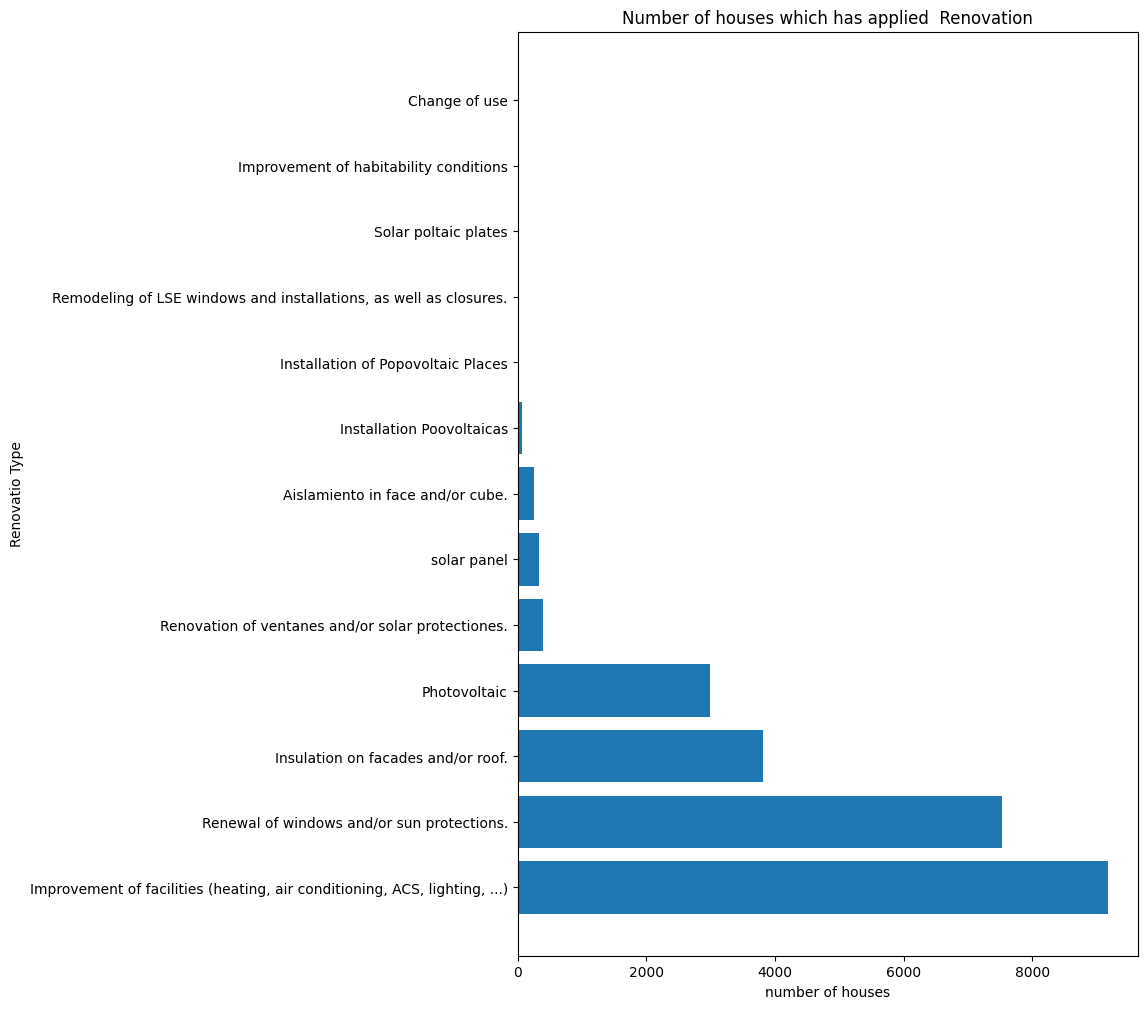

In [ ]:
plt.figure(figsize=(8,12))
plt.barh(counts.head(13).index, counts.head(13).values)
plt.xlabel('number of houses')
plt.ylabel('Renovatio Type')
plt.title('Number of houses which has applied  Renovation')
plt.show()


In [ ]:
df[df['grouped_translated']=='Other']

,Unnamed: 0,Renovation_Types,Translated_Renovation_Types,grouped_translated
1,100,"[""Es tracta d'un edifici en construcció amb un...",It is a building under construction with a gra...,Other
9,416,"['Millora de les instal·lacions (calefacció, c...",Photovoltaic plates and installation of more h...,Other
10,531,"[""Instal·lació fotovoltaica per règim d'autoco...",Photovoltaic installation by self -consumption...,Other
14,832,['rehabilitació integral conservant les façanes'],Comprehensive rehabilitation retaining facades,Other
17,980,"['Millora de les instal·lacions (calefacció, c...",Photovoltaic,Other
...,...,...,...,...
17101,1335884,"['Millora de les instal·lacions (calefacció, c...",photovoltaic system,Other
17102,1335913,['Instal·lació de 30 panells fotovoltaics de 5...,Installation of 30 500 W photovoltaic panels o...,Other
17105,1336132,"['Millora de les instal·lacions (calefacció, c...",Autocosum photovoltaic installation,Other
17107,1336302,['Renovació de finestres i/o proteccions solar...,Closing of the fireplace and insulation of the...,Other


In [ ]:
counts.head(40)


,count
Translated_Renovation_Types,
"Improvement of facilities (heating, air conditioning, ACS, lighting, ...)",8637
Renewal of windows and/or sun protections.,7521
Insulation on facades and/or roof.,3810
"Mejora of installations (heating, climatization, ACS, Albrado, ...)",536
Renovation of ventanes and/or solar protectiones.,397
Photovoltaic installation,359
Installation of photovoltaic panels,275
Aislamiento in face and/or cube.,253
Solar photovoltaic installation,248


In [ ]:
dfff=pd.read_csv('grouped_renovation.csv')
dfff

,Unnamed: 0,Renovation_Types,Translated_Renovation_Types,grouped_translated
0,28,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
1,100,"[""Es tracta d'un edifici en construcció amb un...",It is a building under construction with a gra...,Other
2,111,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.
3,111,['Renovació de finestres i/o proteccions solar...,"Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
4,199,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
...,...,...,...,...
25907,1336532,"['Aïllament en façanes i/o coberta.', 'Renovac...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
25908,1336570,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.
25909,1336683,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.
25910,1336815,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."


#### count the uniques **after** grouping similar phrases

In [ ]:
import pandas as pd

def reduce_cardinality(df, column, threshold=0.0005):
    total = len(df)
    counts = df[column].value_counts()
    # Determine values that meet the threshold frequency
    keep = counts[counts / total >= threshold].index
    df['grouped_translated'] = df[column].apply(lambda x: x if x in keep else 'Other')
    return df, counts
grouped_count, counts = reduce_cardinality(df_exploded,'Translated_Renovation_Types')
counts.head(20)


,count
Translated_Renovation_Types,
"Improvement of facilities (heating, air conditioning, ACS, lighting, ...)",9173
Renewal of windows and/or sun protections.,7521
Insulation on facades and/or roof.,3810
Photovoltaic,2342
Photovoltaic self consumption,531
Renovation of ventanes and/or solar protectiones.,397
solar panel,341
Aislamiento in face and/or cube.,253
Installation Poovoltaicas,62


installation of photovoltaic panels


In [ ]:

import pandas as pd

def reduce_cardinality(df, column, threshold=0.0005):
    total = len(df)
    counts = df[column].value_counts()
    # Determine values that meet the threshold frequency
    keep = counts[counts / total >= threshold].index
    df['grouped_translated'] = df[column].apply(lambda x: x if x in keep else 'Other')
    return df, counts
grouped_count, counts = reduce_cardinality(df_exploded,'Merge_All_Photovoltaic')
counts.head(20)

,count
Merge_All_Photovoltaic,
"Improvement of facilities (heating, air conditioning, ACS, lighting, ...)",9173
Renewal of windows and/or sun protections.,7521
Insulation on facades and/or roof.,3810
Photovoltaic,2992
Renovation of ventanes and/or solar protectiones.,397
solar panel,341
Aislamiento in face and/or cube.,253
Installation Poovoltaicas,62
Installation of Popovoltaic Places,22


In [ ]:
df_exploded.to_csv('preprocessed_renovation.csv', index=False)

In [ ]:
df = pd.read_csv('preprocessed_renovation.csv')
df

,Unnamed: 0,Renovation_Types,Translated_Renovation_Types,Merge_All_Photovoltaic,grouped_translated
0,28,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
1,100,"[""Es tracta d'un edifici en construcció amb un...",It is a building under construction with a gra...,It is a building under construction with a gra...,Other
2,111,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.
3,111,['Renovació de finestres i/o proteccions solar...,"Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
4,199,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
...,...,...,...,...,...
25907,1336532,"['Aïllament en façanes i/o coberta.', 'Renovac...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
25908,1336570,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.
25909,1336683,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.
25910,1336815,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."


In [ ]:
df['grouped_translated'].value_counts()

,count
grouped_translated,
"Improvement of facilities (heating, air conditioning, ACS, lighting, ...)",9173
Renewal of windows and/or sun protections.,7521
Insulation on facades and/or roof.,3810
Photovoltaic,2342
Other,1393
Photovoltaic self consumption,531
Renovation of ventanes and/or solar protectiones.,397
solar panel,341
Aislamiento in face and/or cube.,253
